# Маркетинговый анализ развлекательного приложения Procrastinate Pro+.

Несколько прошлых месяцев бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого.
<br>Необходимо ответить на вопросы:
- [Как клиенты пользуются приложением?](#Исследовательский-анализ-данных-2) 
- [Когда они начинают покупать?](#Рассчет-метрик-и-построение-графиков.-3) 
- [Сколько денег приносит каждый клиент?](#Продажи:-3.2)
- [Когда он окупается и какие факторы отрицательно влияют на привлечение пользователей?](#Оценка-окупаемости-рекламы-для-привлечения-пользователей-4) 

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

В нашем распоряжении три датасета. Файл `visits_info.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info.csv` — информацию о покупках, а `costs.csv` — информацию о расходах на рекламу.

Структура `visits_info.csv`
<br>`User Id` — уникальный идентификатор пользователя,
<br>`Region` — страна пользователя,
<br>`Device` — тип устройства пользователя,
<br>`Channel` — идентификатор источника перехода,
<br>`Session Start` — дата и время начала сессии,
<br>`Session End` — дата и время окончания сессии.

Структура `orders_info.csv`
<br>`User Id` — уникальный идентификатор пользователя,
<br>`Event Dt` — дата и время покупки,
<br>`Revenue` — сумма заказа.

Структура `costs_info.csv`
<br>`Channel` — идентификатор рекламного источника,
<br>`Dt` — дата проведения рекламной кампании,
<br>`Costs` — расходы на эту кампанию.

[Проведенный в проекте анализ данных позволил выявить наименее эффективные каналы привлечения - FaceBoom и TipTop. 
lambdaMediaAds и AdNonSense - стоит развивать и делать упор именно на эти рекламные каналы.](#Выводы-5)

## Загрузка и изучение данных.


In [1]:
!pip install plotly==4.14.3

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 13.2 MB 10.5 MB/s eta 0:00:01


In [2]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 285 kB 1.1 MB/s eta 0:00:01


In [3]:
!pip install -U pandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.9 MB 12.9 MB/s eta 0:00:01


In [4]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import plotly.express as px

import warnings

from datetime import datetime, timedelta

In [5]:
### Убираем предупреждения
warnings.filterwarnings("ignore")

### Приводим цифры к читаемому формату. Без экспоненциальной записи
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Выставляем стиль визуализаций seaborn.
sns.set(style='whitegrid')

In [6]:
### Загружаем данные.
visits = pd.read_csv('/datasets/visits_info.csv')
orders = pd.read_csv('/datasets/orders_info.csv')
costs = pd.read_csv('/datasets/costs_info.csv')

In [7]:
display(visits.head())
display(visits.info())
display(visits.duplicated().mean())

User Id         Region   Device  Channel     Session Start  \
0  981449118918  United States   iPhone  organic  01.05.2019 02:36   
1  278965908054  United States   iPhone  organic  01.05.2019 04:46   
2  590706206550  United States      Mac  organic  01.05.2019 14:09   
3  326433527971  United States  Android   TipTop  01.05.2019 00:29   
4  349773784594  United States      Mac  organic  01.05.2019 03:33   

        Session End  
0  01.05.2019 02:45  
1  01.05.2019 04:47  
2  01.05.2019 15:32  
3  01.05.2019 00:54  
4  01.05.2019 03:57

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

0.0

In [8]:
display(orders.head())
display(orders.info())
display(orders.duplicated().mean())

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

0.0

In [9]:
display(costs.head())
display(costs.info())
display(costs.duplicated().mean())

dt   Channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

0.0

Приведем названия столбцов к нижнему регистру и заменим пробелы на нижнее подчеркивание. Столбцы с датами форматируем к типу datetime. Пропусков и дубликатов в данных нет. 

### Предобработка данных

In [10]:
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.lower().str.replace(" ", "_")

visits['session_start'] = pd.to_datetime(visits['session_start'], format='%d.%m.%Y %H:%M')
visits['session_end'] = pd.to_datetime(visits['session_end'], format='%d.%m.%Y %H:%M')
orders['event_dt'] = pd.to_datetime(orders['event_dt'], format='%Y.%m.%d %H:%M')
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y.%m.%d').dt.date

Обработали данные и привели столбцы к нужным форматам.

In [11]:
display(costs.head())
display(orders.head())
display(visits.head())

dt   channel  costs
0  2019-05-01  FaceBoom 113.30
1  2019-05-02  FaceBoom  78.10
2  2019-05-03  FaceBoom  85.80
3  2019-05-04  FaceBoom 136.40
4  2019-05-05  FaceBoom 122.10

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:00   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:00   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:00   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:00   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:00   

          session_end  
0 2019-05-01 02:45:00  
1 2019-05-01 04:47:00  
2 2019-05-01 15:32:00  
3 2019-05-01 00:54:00  
4 2019-05-01 03:57:00

#### Создадим функции

##### Профили

In [12]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

##### LTV и ROI

In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # считаем САС
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

##### Удержание

In [14]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Конверсия

In [15]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

##### Графики LTV и ROI

In [16]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

##### Графики удержания

In [17]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

##### Графики конверсии

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

Создали функции для построения профилей, удержания, конверсии, LTV и ROI

## Исследовательский анализ данных
### Создадим пользовательские профили. Определим минимальную и максимальную даты привлечения пользователей.

In [19]:
### Получаем профили пользователей из функции.
profiles = get_profiles(visits, orders, costs)
### Выведем 5 первых строк.
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:00    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:00    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:00     organic  iPhone         France   
3  22593348 2019-08-22 21:35:00  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:00     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True              1.09  
1  2019-07-09 2019-07-01  False              1.11  
2  2019-10-01 2019-10-01  False              0.00  
3  2019-08-22 2019-08-01  False              0.99  
4  2019-10-02 2019-10-01  False              0.23

In [20]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


In [21]:
### Зададим функцию группировки профилей пользователей по необходимому параметру
def profile_groups(profiles, grouping):
    grouping_users = (profiles.groupby(grouping)
            .agg(cnt_all=('user_id','count'), cnt_payers=('payer','sum'))
            .sort_values(by='cnt_all', ascending=False)
            .reset_index()
            )
    grouping_users['perc_of_payers'] = grouping_users['cnt_payers'] / grouping_users['cnt_all']
    return grouping_users

### Из каких стран пользователи приходят в приложение? 

In [22]:
### Получим результат работы функции с параметром 'region'
(profile_groups(profiles, 'region')
        .sort_values(by='perc_of_payers', ascending=False) # Отсортируем по убыванию % платящих пользователей.
        .reset_index(drop=True) 
        .style.format({'perc_of_payers':"{:.2%}"}) # Зададим удобный для прочтения формат столбца 
       )

Больше всего пользователей приходит из США - 100002. Там же и самый высокий процент платящих пользователей, почти 7% всех пользователей из США платят. В то же время в странах Европы, посетителей намного меньше и только 4% из них готовы платить. 


### Какими устройствами пользуются клиенты?

In [23]:
### Получим результат работы функции с параметром 'device'
(profile_groups(profiles, 'device')
        .sort_values(by='perc_of_payers', ascending=False) # Отсортируем по убыванию % платящих пользователей.
        .reset_index(drop=True)
        .style.format({'perc_of_payers':"{:.2%}"}) # Зададим удобный для прочтения формат столбца 
       )

Большинство пользователей используют приложение на девайсах компании Apple, у них же самый высокий процент покупок. За ними идут пользователи Android с отставанием в 0,5%. PC последние с отставанием в 0,8% от Android. Чем дешевле девайс, тем меньше готовы платить пользователи. 


### Из каких рекламных источников приходят пользователи?

In [24]:
### Получим результат работы функции с параметром 'channel'
(profile_groups(profiles, 'channel')
        .sort_values(by='perc_of_payers', ascending=False) # Отсортируем по убыванию % платящих пользователей.
        .reset_index(drop=True)
        .style.format({'perc_of_payers':"{:.2%}"}) # Зададим удобный для прочтения формат столбца 
       )

У канала FaceBoom самые лучшие показатели - 12,2% привлеченных клиентов платят и подавляющее большинство новых пользователей пришло именно отсюда - 29144. На втором месте AdNonSense, третьем lambdaMediaAds. Эти каналы привлекают меньше всего пользователей, но имеют высокие 10-11% платящих пользователей. Хорошо себя показывает канал TipTop - 9,6% при привлеченных 19561 пользователе. Этим каналам стоит уделить особое внимание, при планировании маркетинговых акций. AdNonSense и lambdaMediaAds имеют большой потенциал для роста.


### Вывод

Больше всего пользователей приходит из США - 100002. Там же и самый высокий процент платящих пользователей, почти 7%.

Большинство пользователей используют приложение на девайсах компании Apple, у них же самый высокий процент покупок.

У канала FaceBoom самые лучшие показатели - 12,2% привлеченных клиентов платят и подавляющее большинство новых пользователей пришло именно отсюда - 29144. На втором месте AdNonSense, третьем lambdaMediaAds.

## Рассчет метрик и построение графиков.
### Продукт:

In [25]:
### Создадим столбцы с месяцем, неделей и днем посещения
visits['session_month'] = visits['session_start'].astype('datetime64[M]')
visits['session_week'] = visits['session_start'].dt.week
visits['session_date'] = visits['session_start'].dt.date


#### Сколько людей пользуются в день, неделю, месяц?

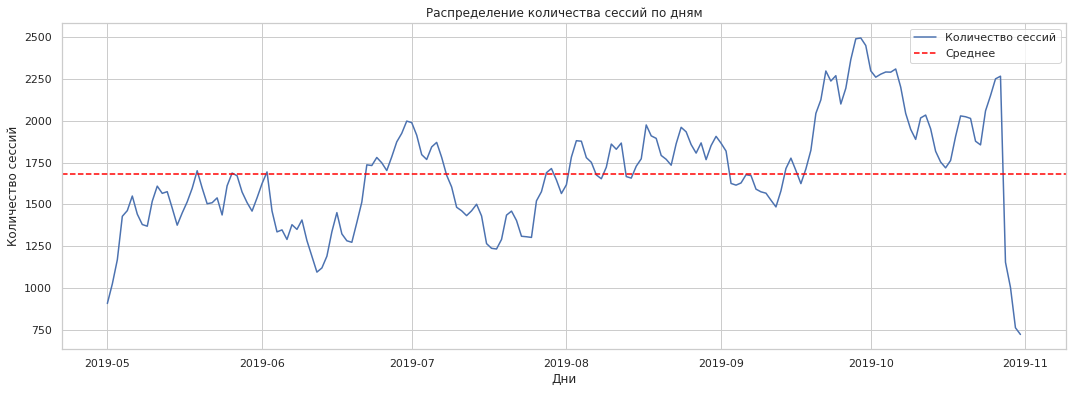

Среднее количество пользователей в день: 1684


In [26]:
### Сгруппируем visits для создания DAU.
dau_total = (
    visits.groupby('session_date')
    .agg(user_count=('user_id','nunique'))
    .reset_index()
)

### Построим график
plt.figure(figsize =(18, 6))
sns.lineplot(data=dau_total, x='session_date', y='user_count', label='Количество сессий')
### Добавим линию среднего значения.
plt.axhline(y=dau_total['user_count'].mean().astype(int), 
            color='red', 
            linestyle='--',
            label='Среднее')
plt.ylabel('Количество сессий')
plt.xlabel('Дни')
plt.title('Распределение количества сессий по дням')
plt.legend()
plt.show()

### Выведем на экран среднее значение 
print('Среднее количество пользователей в день:', dau_total['user_count'].mean().astype(int))

На графике видны явные провалы по количеству пользователей в Июне, Июле, Сентябре и Октябре. Возможно, маркетинговые акции проводились в конце месяца?

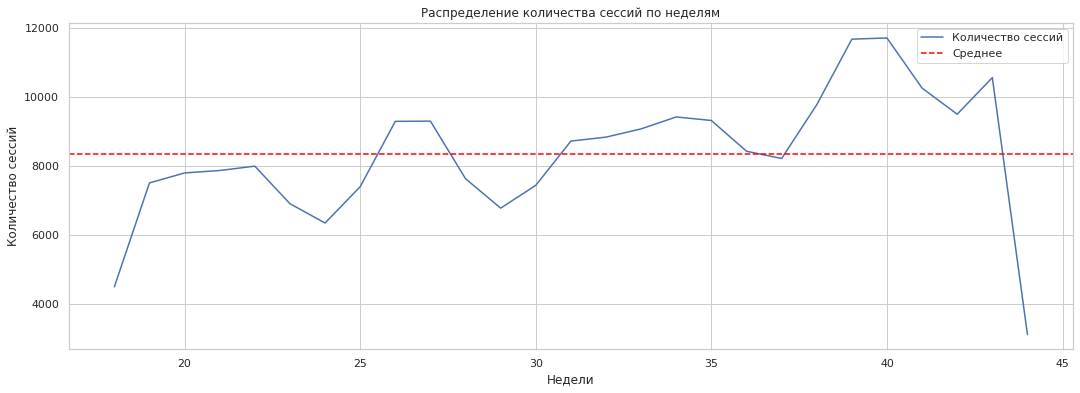

Среднее количество пользователей в неделю: 8353


In [27]:
### Сгруппируем visits для создания WAU.
wau_total = (
    visits.groupby('session_week')
    .agg(user_count=('user_id','nunique'))
    .reset_index()
)

### Построим график
plt.figure(figsize =(18, 6))
sns.lineplot(data=wau_total, x='session_week', y='user_count', label='Количество сессий')
### Добавим линию среднего значения.
plt.axhline(y=wau_total['user_count'].mean().astype(int), 
            color='red', 
            linestyle='--',
            label='Среднее')
plt.ylabel('Количество сессий')
plt.xlabel('Недели')
plt.title('Распределение количества сессий по неделям')
plt.legend()
plt.show()

### Выведем на экран среднее значение 
print('Среднее количество пользователей в неделю:', wau_total['user_count'].mean().astype(int))

На недельном графике, так же выделяются середина Июня и Июля. Немного Сентябрь.

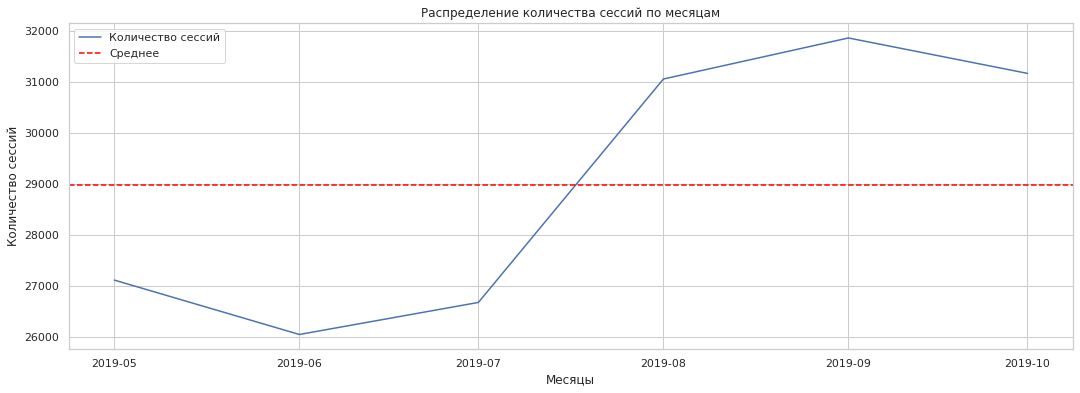

Среднее количество пользователей в месяц: 28989


In [28]:
### Сгруппируем visits для создания MAU.
mau_total = (
    visits.groupby('session_month')
    .agg(user_count=('user_id','nunique'))
    .reset_index()
)

plt.figure(figsize =(18, 6))
sns.lineplot(data=mau_total, x='session_month', y='user_count', label='Количество сессий')
### Добавим линию среднего значения.
plt.axhline(y=mau_total['user_count'].mean().astype(int), 
            color='red', 
            linestyle='--',
            label='Среднее')
plt.ylabel('Количество сессий')
plt.xlabel('Месяцы')
plt.title('Распределение количества сессий по месяцам')
plt.legend()
plt.show()

### Выведем на экран среднее значение 
print('Среднее количество пользователей в месяц:', mau_total['user_count'].mean().astype(int))

Июнь и Июль оказались самыми провальными месяцами. В октябре не хватает 3 дней, график скорее всего пойдет выше.

#### Сколько сессий в день?

In [29]:
### Сгруппируем visits для получения сессий всех пользователей. 
sessions_total = (
    visits.groupby('session_date')
    .agg(session_cnt=('user_id', 'count'))
    .reset_index()
)

### Построим график 
fig = px.bar(sessions_total, 
             x='session_date', 
             y='session_cnt',
             template='plotly_white', 
             width=950,
             height=500, 
             title="Количество сессий в день", 
             labels={'session_date':'Дни использования', 'session_cnt':'Количество сессий'}
             )
### Добавим линию среднего значения
fig.add_hline(sessions_total['session_cnt'].mean(), annotation_text="Среднее количество сессий", 
              annotation_position="top left")
fig.show()

### Выведем на экран среднее значение
print('Среднее количество сессий в день:', sessions_total['session_cnt'].mean().astype(int))

Среднее количество сессий в день: 1684


Видим все те же провалы посещаемости, что и на предыдущих графиках. На одного пользователя приходится 1 сессия в день. Что же происходило в Июне и Июле?

#### Сколько длится одна сессия?

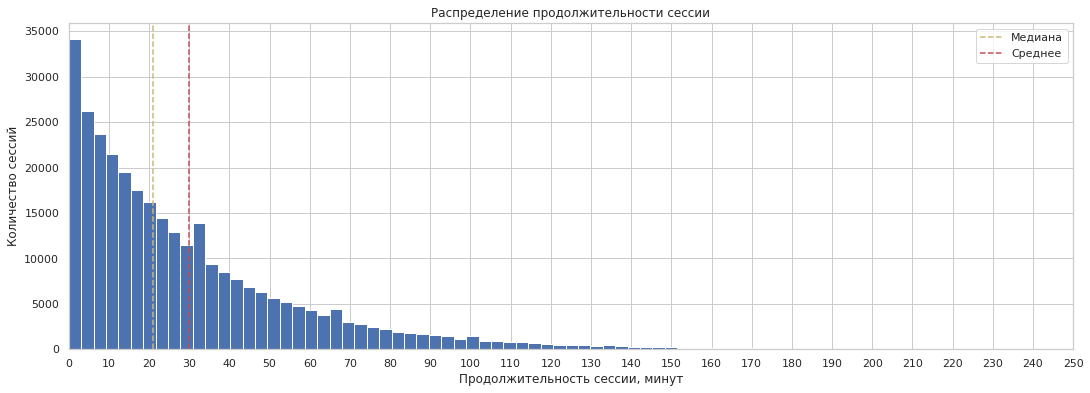

Средняя продолжительность сессии: 30.00 минут
Медиана продолжительности сессии: 21.00 минут


In [30]:
### Получим длительность сессии в минутах
session_duration_min = (
    visits['session_end'] - visits['session_start']
).dt.total_seconds() / 60

### Построим график
plt.figure(figsize =(18, 6))
g = session_duration_min.hist(bins=120)
### Добавим линию медианы
plt.axvline(x=session_duration_min.median(), 
            color='y', 
            linestyle='--',
            label='Медиана')
### Добавим линию среднего
plt.axvline(x=session_duration_min.mean(), 
            color='r', 
            linestyle='--',
            label='Среднее')
plt.legend()
plt.xlim([0, 250])
g.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.ylabel('Количество сессий')
plt.xlabel('Продолжительность сессии, минут')
plt.title('Распределение продолжительности сессии')
plt.show()

print('Средняя продолжительность сессии: {:.2f} минут'.format((session_duration_min.mean())))
print('Медиана продолжительности сессии: {:.2f} минут'.format((session_duration_min.median())))

Основная масса пользователей используют приложение до 2 часов. Имеется небольшое количество сессий с продолжительностью более 4 часов. 

### Продажи:

#### Когда люди начинают покупать?

In [31]:
### Сгруппируем таблицу и получим время первой покупки
first_orders = orders.groupby('user_id').agg({'event_dt':'first'}).reset_index()

### Получим табличку с данными о первых покупках пользователей
user_orders = profiles.merge(first_orders, on='user_id', how='inner')

### Посчитаем количество минут с первой сессии до покупки
minutes_to_buy = (user_orders['event_dt'] - user_orders['first_ts']).dt.total_seconds() / 60

minutes_to_buy.describe([.63, .64])

count     8881.00
mean      2711.84
std       8692.34
min          0.00
50%          1.17
63%          2.26
64%        266.63
max     190314.92
dtype: float64

Начиная с 64 процентиля, резко возрастает время с первого посещения до первой покупки - в 100 раз. Мы разделили людей на две группы, быстро решившихся на покупку и более вдумчивых.

In [32]:
### Получим время для быстрых пользователей
minutes_to_buy_under_64_perc = minutes_to_buy.where(minutes_to_buy < minutes_to_buy.quantile(.63))

print('Пользователей, быстро решивших сделать покупку:', minutes_to_buy_under_64_perc.count())
print('Среднее время с момента первого посещения до покупки: {:.2f} минут'.format(minutes_to_buy_under_64_perc.mean()))
print('Медиана времени с момента первого посещения до покупки: {:.2f} минут'.format(minutes_to_buy_under_64_perc.median()))

Пользователей, быстро решивших сделать покупку: 5595
Среднее время с момента первого посещения до покупки: 0.83 минут
Медиана времени с момента первого посещения до покупки: 0.80 минут


In [33]:
### Получим время для медленных пользователей
minutes_to_buy_higher_64_perc = minutes_to_buy.where(minutes_to_buy.quantile(.64) < minutes_to_buy) 

print('Пользователей, долго решавших сделать покупку:', minutes_to_buy_higher_64_perc.count())
print('Среднее время с момента первого посещения до покупки: {:.2f} дней'.format(minutes_to_buy_higher_64_perc.mean()/1440))
print('Медиана времени с момента первого посещения до покупки: {:.2f} дней'.format(minutes_to_buy_higher_64_perc.median()/1440))

Пользователей, долго решавших сделать покупку: 3197
Среднее время с момента первого посещения до покупки: 5.23 дней
Медиана времени с момента первого посещения до покупки: 2.45 дней


Почти 5,6 тысяч пользователей сделали первую покупку меньше чем через 2 минуты, после первого посещения приложения. Среднее время 0,8 минуты. Вот это скорость!

3,2 тысячи пользователей решили подумать о покупке больше - в среднем 5 дней или 2,5 дня по медиане. 

####  Сколько покупок делает в среднем платящий пользователь за месяц, неделю, день? Какой средний чек?

In [34]:
### Зададим столбцы для каждого промежутка
orders['event_month'] = orders['event_dt'].astype('datetime64[M]')
orders['event_week'] = orders['event_dt'].dt.week
orders['event_day'] = orders['event_dt'].astype('datetime64[D]')

In [35]:
### Создадим функцию для подсчета средних покупок и чеков
def orders_mean(df, event_time):
    event_time_orders = (df.groupby(['user_id', event_time])
                      .agg(sum_orders=('revenue', 'sum'), count_orders=('revenue', 'count'))
                      .reset_index()
              )

    event_time_orders_mean = (event_time_orders.groupby(event_time)
                     .agg(sum_mean=('sum_orders', 'mean'), count_mean=('count_orders', 'mean'))
                     .reset_index()
                     .sort_values(by=event_time)
                    )
    return event_time_orders_mean

In [36]:
### Получим таблицы из функции 
month_orders_mean = orders_mean(orders, 'event_month')
week_orders_mean = orders_mean(orders, 'event_week')
day_orders_mean = orders_mean(orders, 'event_day')

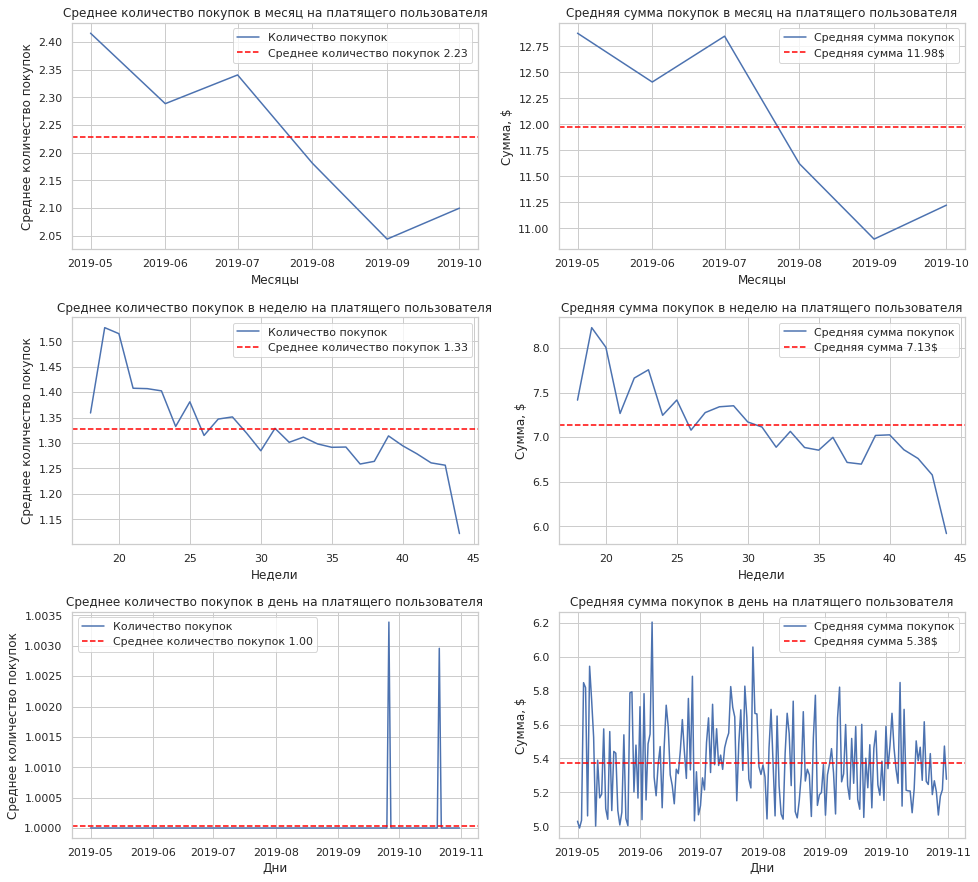

In [37]:
### Построим графики
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize=(16, 15))

sns.lineplot(data=month_orders_mean, x='event_month', y='count_mean', label='Количество покупок', ax=axes[0,0])
axes[0,0].axhline(y=month_orders_mean['count_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Среднее количество покупок {:.2f}'.format(month_orders_mean['count_mean'].mean()))
axes[0,0].set_ylabel('Среднее количество покупок')
axes[0,0].set_xlabel('Месяцы')
axes[0,0].set_title('Среднее количество покупок в месяц на платящего пользователя')
axes[0,0].legend()

sns.lineplot(data=month_orders_mean, x='event_month', y='sum_mean', label='Средняя сумма покупок', ax=axes[0,1])
axes[0,1].axhline(y=month_orders_mean['sum_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Средняя сумма {:.2f}$'.format(month_orders_mean['sum_mean'].mean()))
axes[0,1].set_ylabel('Сумма, $')
axes[0,1].set_xlabel('Месяцы')
axes[0,1].set_title('Средняя сумма покупок в месяц на платящего пользователя')
axes[0,1].legend()


sns.lineplot(data=week_orders_mean, x='event_week', y='count_mean', label='Количество покупок', ax=axes[1,0])
axes[1,0].axhline(y=week_orders_mean['count_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Среднее количество покупок {:.2f}'.format(week_orders_mean['count_mean'].mean()))
axes[1,0].set_ylabel('Среднее количество покупок')
axes[1,0].set_xlabel('Недели')
axes[1,0].set_title('Среднее количество покупок в неделю на платящего пользователя')
axes[1,0].legend()

sns.lineplot(data=week_orders_mean, x='event_week', y='sum_mean', label='Средняя сумма покупок', ax=axes[1,1])
axes[1,1].axhline(y=week_orders_mean['sum_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Средняя сумма {:.2f}$'.format(week_orders_mean['sum_mean'].mean()))
axes[1,1].set_ylabel('Сумма, $')
axes[1,1].set_xlabel('Недели')
axes[1,1].set_title('Средняя сумма покупок в неделю на платящего пользователя')
axes[1,1].legend()

sns.lineplot(data=day_orders_mean, x='event_day', y='count_mean', label='Количество покупок', ax=axes[2,0])
axes[2,0].axhline(y=day_orders_mean['count_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Среднее количество покупок {:.2f}'.format(day_orders_mean['count_mean'].mean()))
axes[2,0].set_ylabel('Среднее количество покупок')
axes[2,0].set_xlabel('Дни')
axes[2,0].set_title('Среднее количество покупок в день на платящего пользователя')
axes[2,0].legend()

sns.lineplot(data=day_orders_mean, x='event_day', y='sum_mean', label='Средняя сумма покупок', ax=axes[2,1])
axes[2,1].axhline(y=day_orders_mean['sum_mean'].mean(), 
            color='red', 
            linestyle='--',
            label='Средняя сумма {:.2f}$'.format(day_orders_mean['sum_mean'].mean()))
axes[2,1].set_ylabel('Сумма, $')
axes[2,1].set_xlabel('Дни')
axes[2,1].set_title('Средняя сумма покупок в день на платящего пользователя')
axes[2,1].legend()

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


Платящие пользователи все реже делают покупки. Это хорошо заметно на недельном графике. От снижения количества покупок, падает и средний чек. В мае был самый высокий показатель - 2,45 средних покупок в месяц на пользователя и 12,75 долл. средний чек. В Июле среднее количество покупок просело до 2,34, но средний чек такой же как в Мае. А вот начиная с Августа, пошло резкое падение обоих показателей. В Сентябре - 2,05 и 10,9 долл.. По недельним графикам, падение не столь резкое, но стабильное. Необходимо увеличивать показатель покупок платящих пользователей.  

### Маркетинг:

#### Сколько всего денег потратили?

In [38]:
print('Всего потрачено: {:.2f}$'.format(costs['costs'].sum()))

Всего потрачено: 105497.30$


#### Сколько денег потратили на каждый рекламный канал?

In [39]:
### Получим табличку с суммой трат на каждый рекламный канал
channel_costs = (costs.groupby('channel')
                 .agg(sum_cost=('costs', 'sum'))
                 .sort_values(by='sum_cost', ascending=False)
                 .reset_index()
                )

### Создадим столбец с процентом от общих трат
channel_costs['perc_cost'] = channel_costs['sum_cost'] / costs['costs'].sum()

channel_costs.style.format({'sum_cost':'{:.0f}','perc_cost':'{:.2%}'})

Каналы с самым высоким % платящих пользователей - FaceBoom, AdNonSense, lambdaMediaAds, TipTop. На каналы TipTop и FaceBoom выделяется 83% всех средств. Явно видно, что AdNonSense и lambdaMediaAds сильно недооценены. Стоит больше средств выделять именно в эти рекламные каналы.

#### Сколько денег тратили в течении периода?

In [40]:
### Получим табличку распределения трат на рекламу по дням
costs_dt = (costs.groupby('dt')
            .agg(sum_cost=('costs', 'sum'))
            .reset_index()
            .sort_values(by='dt', ascending=False)
           )

### Построим график
fig = px.line(costs_dt, 
              x='dt', 
              y='sum_cost', 
              template='plotly_white', 
              width=950,
              height=500, 
              title='Распределение суммы потраченных денег на маркетинг по дням', 
              labels={'dt':'Даты', 'sum_cost':'Сумма потраченная на маркетинг, $'})
fig.show()

Во время того, как наблюдались падения в сессиях и посещениях пользователей, было снижение рекламной активности. Пользовательская активность сильно зависит от маркетинговых акций.

#### Сколько в среднем стоило привлечение одного пользователя из каждого источника?

In [41]:
print('C органическими(бесплатными) пользователями:')
print('Привлечение стоило {:.2f}$'.format(profiles['acquisition_cost'].mean()))
print('Без органических(бесплатных) пользователей:')
print('Привлечение стоило {:.2f}$'.format(profiles[profiles['acquisition_cost']>0]['acquisition_cost'].mean()))

C органическими(бесплатными) пользователями:
Привлечение стоило 0.70$
Без органических(бесплатных) пользователей:
Привлечение стоило 1.13$


In [42]:
profiles.groupby('channel').agg(mean_cost=('acquisition_cost','mean')).sort_values(by='mean_cost', ascending=False)

mean_cost
channel                      
TipTop                   2.80
FaceBoom                 1.11
AdNonSense               1.01
lambdaMediaAds           0.72
WahooNetBanner           0.60
RocketSuperAds           0.41
OppleCreativeMedia       0.25
YRabbit                  0.22
MediaTornado             0.22
LeapBob                  0.21
organic                  0.00

lambdaMediaAds - лучший канал для привлечения. На него стоит обратить особое внимание и максимально развивать.

### Вывод

Явные провалы по количеству пользователей в Июне, Июле, Сентябре. 
На одного пользователя приходится 1 сессия в день.

Почти 5,6 тысяч пользователей сделали первую покупку меньше чем через 2 минуты, после первого посещения приложения. Среднее время 0,8 минуты. 3,2 тысячи пользователей решили подумать о покупке больше - в среднем 5 дней или 2,5 дня по медиане.

Платящие пользователи все реже делают покупки. В мае был самый высокий показатель - 2,45 средних покупок в месяц на пользователя и 12,75 долл. средний чек. В Июле среднее количество покупок просело до 2,34, но средний чек такой же как в Мае. А вот начиная с Августа, пошло резкое падение обоих показателей. В Сентябре - 2,05 и 10,9 долл.

Всего на рекламу потрачено: 105497.30$

Каналы с самым высоким процентом платящих пользователей - FaceBoom, AdNonSense, lambdaMediaAds, TipTop. На каналы TipTop и FaceBoom выделяется 83 процента всех средств.

Во время того, как наблюдались падения в сессиях и посещениях пользователей, было снижение рекламной активности. 

Привлечение одного пользователя стоило 1.13$

lambdaMediaAds - лучший канал для привлечения.

## Оценка окупаемости рекламы для привлечения пользователей


In [43]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

### Анализ общей окупаемости рекламы

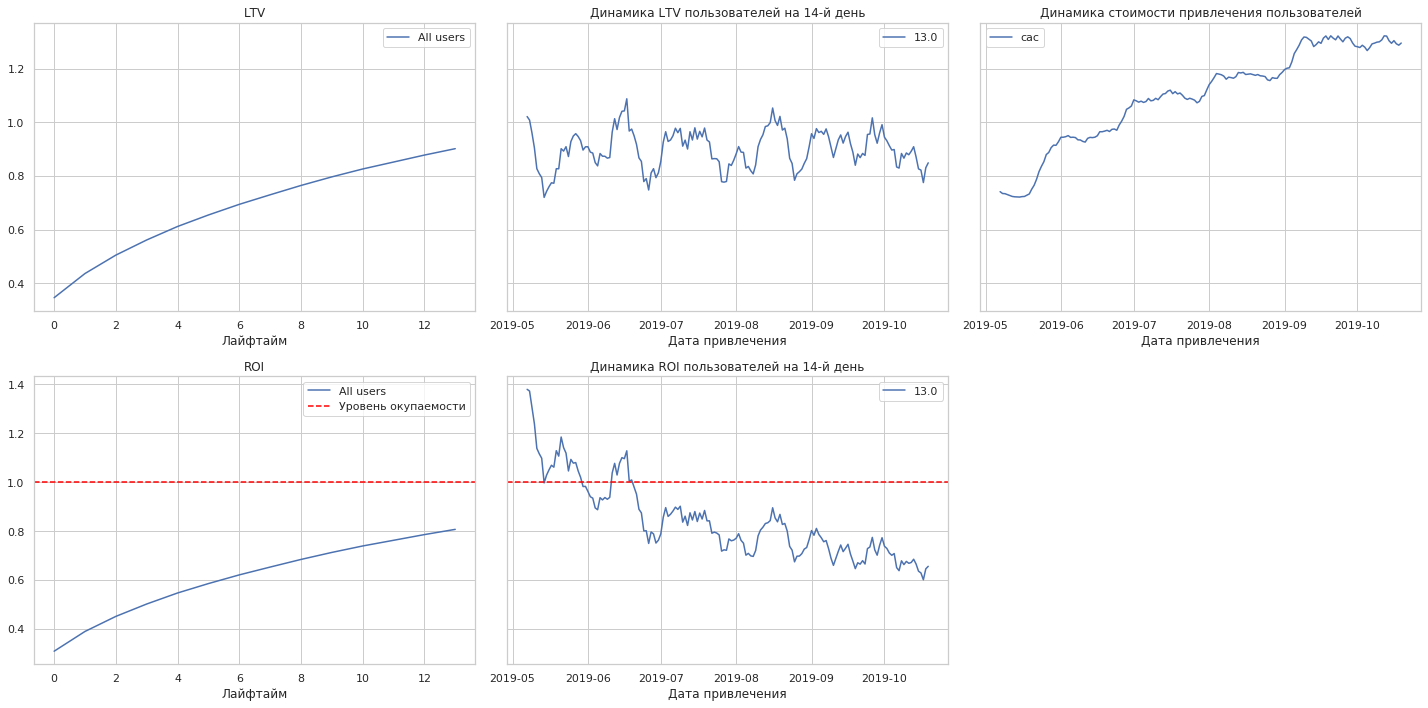

In [44]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), 
    orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Реклама не окупается, стоимость привлечени растет. ROI падает. Все плохо. 

### Анализ окупаемости рекламы с разбивкой по устройствам

In [45]:
### Указываем на разбивку
dimensions = ['device']

### считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), 
    orders, observation_date, horizon_days, dimensions=dimensions
)

### Считаем удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

### Считаем конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

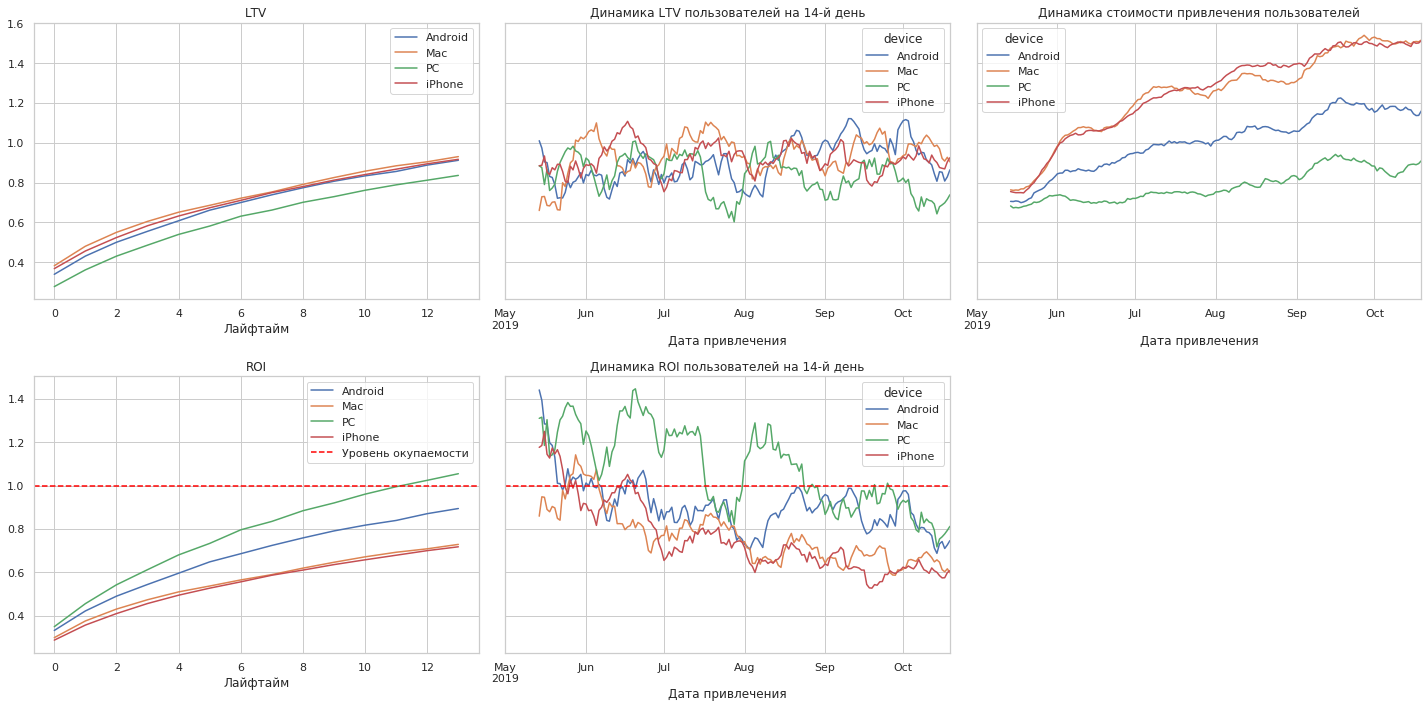

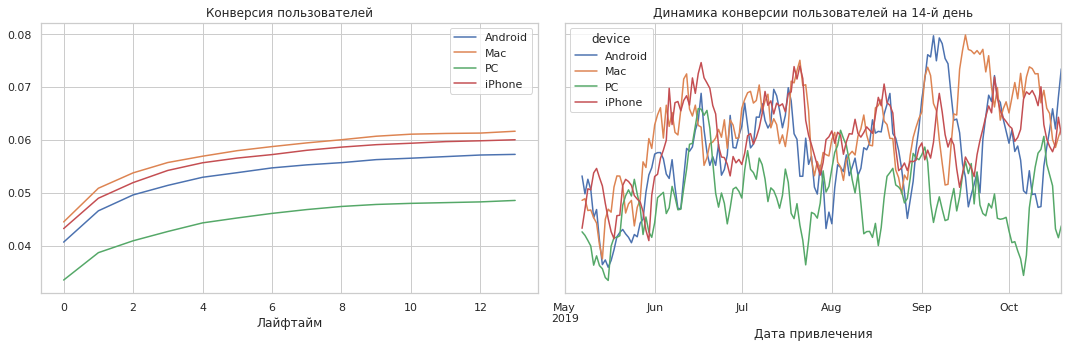

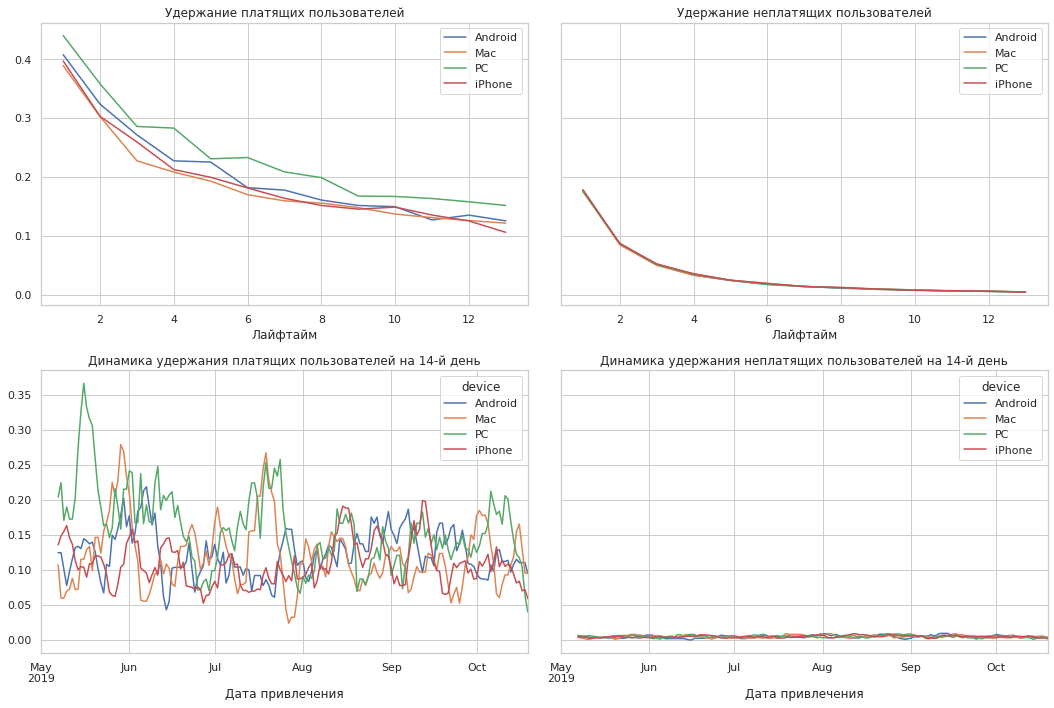

In [46]:
### Строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

plot_retention(retention_grouped, retention_history, horizon_days) 

PC хоть и имеет наименьший % платящих пользователей, но уверено лидирует по ROI и окупается к 11 лайфтайму, стоимость привлечения самая низкая. Хоть у компании Apple и самые лояльные и платящие пользователи, но они же являются самыми дорогими по стоимости привлечения, ROI не окупается, чем ближе к концу изучаемого периода, тем хуже. Пользователи PC плохо конвертируются, но удерживаются лучше остальных. Лучше всего конвертируются владельцы техники Apple, но плохо показывают себя в удержании.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

In [47]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

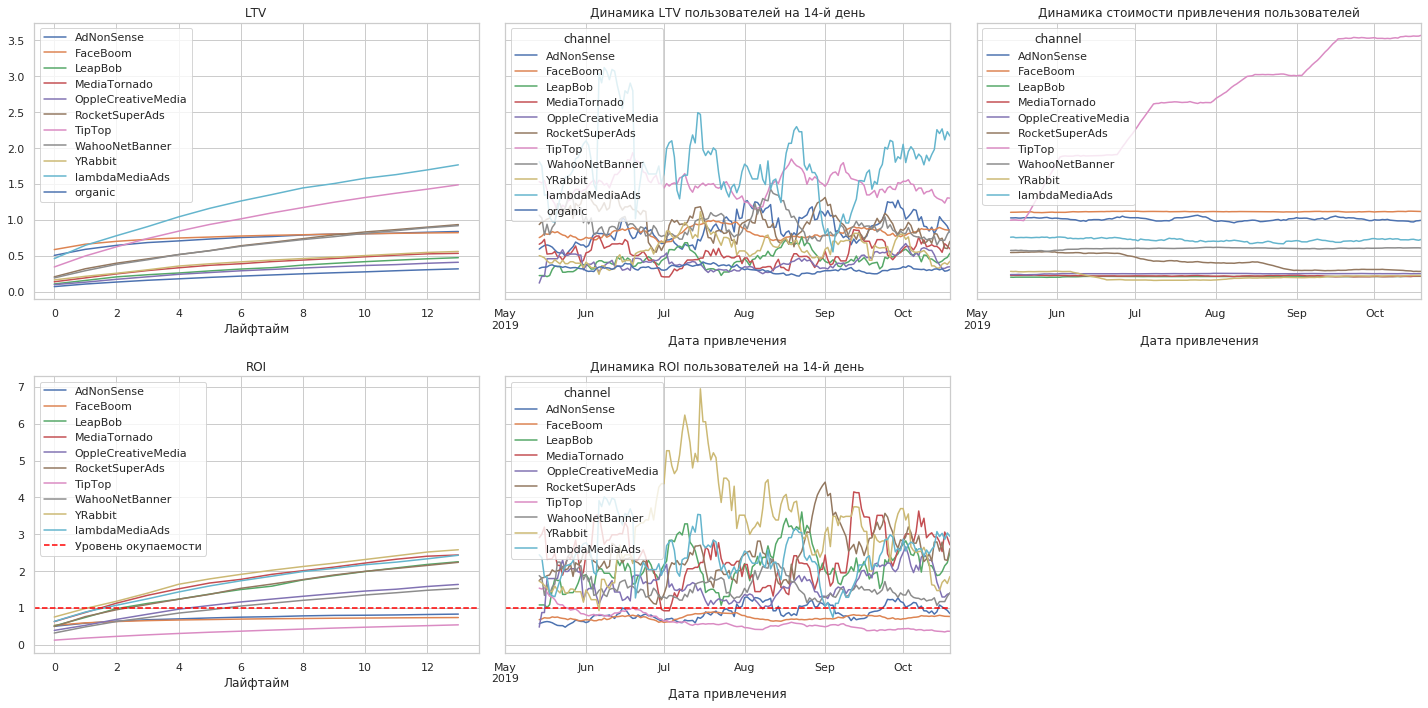

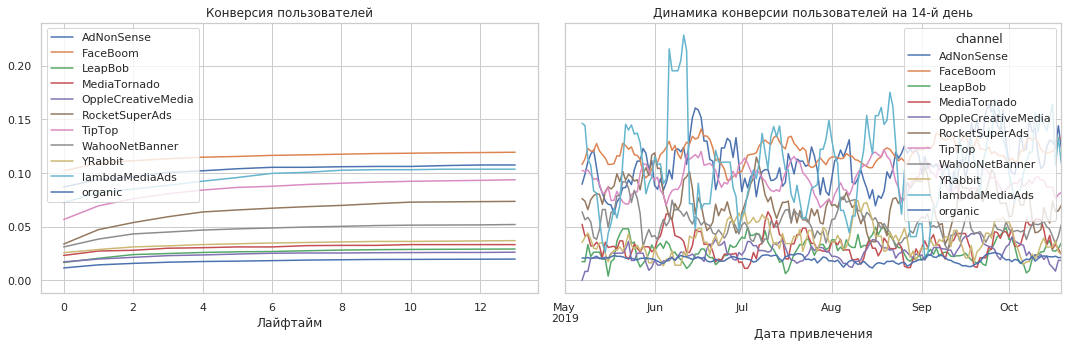

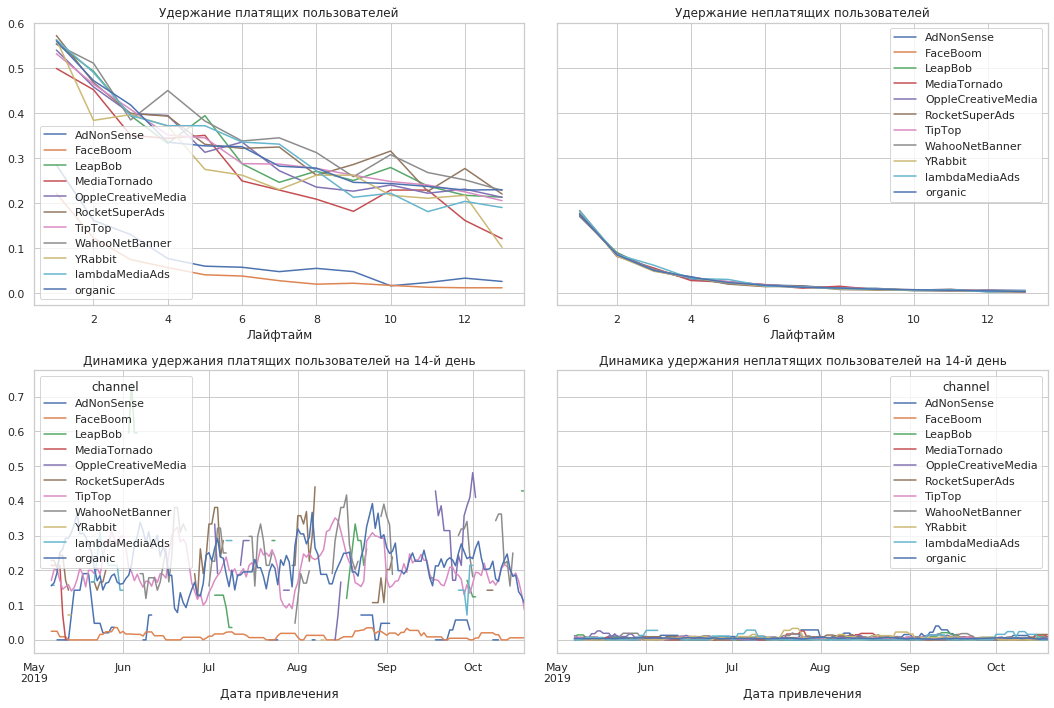

In [48]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

plot_retention(retention_grouped, retention_history, horizon_days) 

Как и раньше, из всех рекламных каналов выделяется lambdaMediaAds. У нее самые лучшие показатели. А вот TipTop и FaceBoom показывают себя не с лучшей стороны. Хоть они и привлекают подавляющее большинство пользователей, эти каналы обходятся очень дорого и не окупаются. Стоимость привлечения через TipTop вообще выросла более чем в 3 раза.
В топе конверсии находятся все те же рекламные каналы, которые хорошо показали себя в процентном соотношении платящих пользователей - FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Но вот FaceBoom показывает просто ужасающие цифры по удержанию платящих пользователей. На 14 день пользователей почти нет. TipTop показывает средние результаты. AdNonSense и lambdaMediaAds показывают высокие результаты и по конверсии и по удержанию.

### Анализ окупаемости рекламы с разбивкой по странам

In [49]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), 
    orders, observation_date, horizon_days, dimensions=dimensions
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

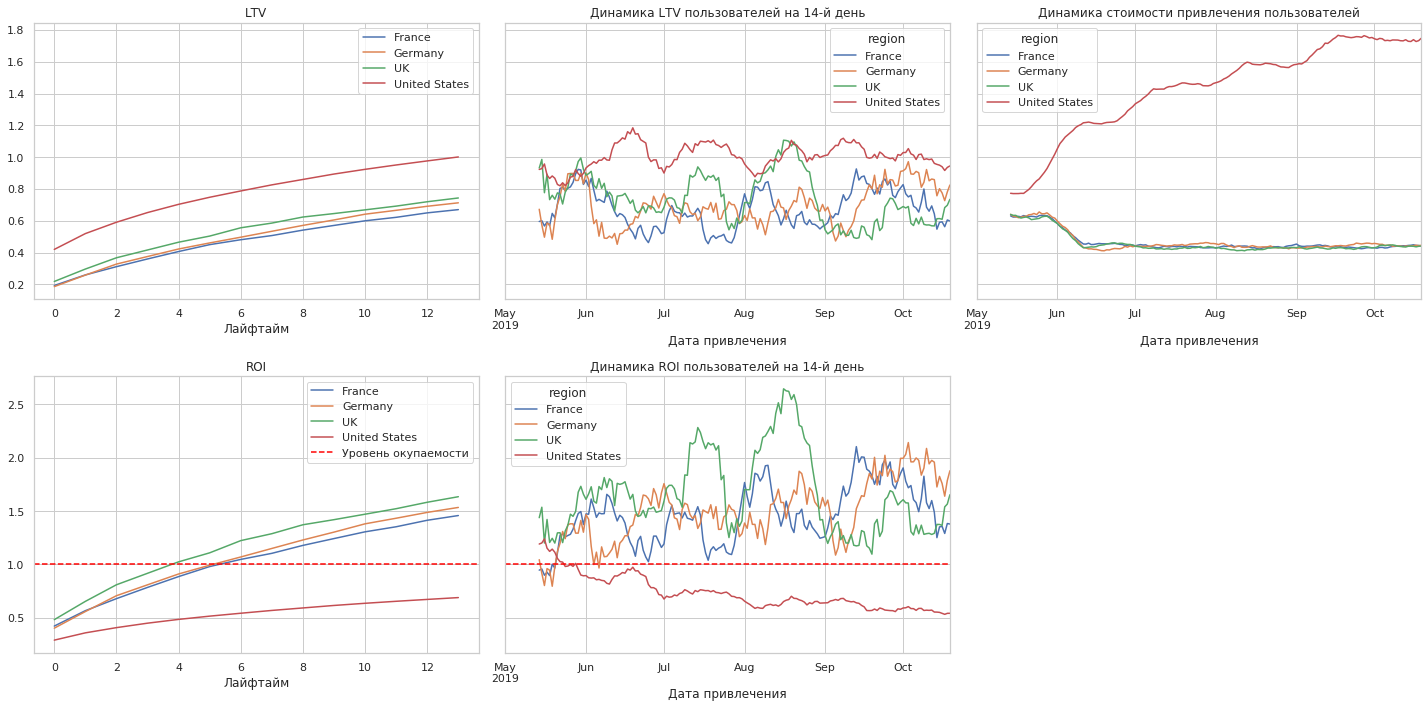

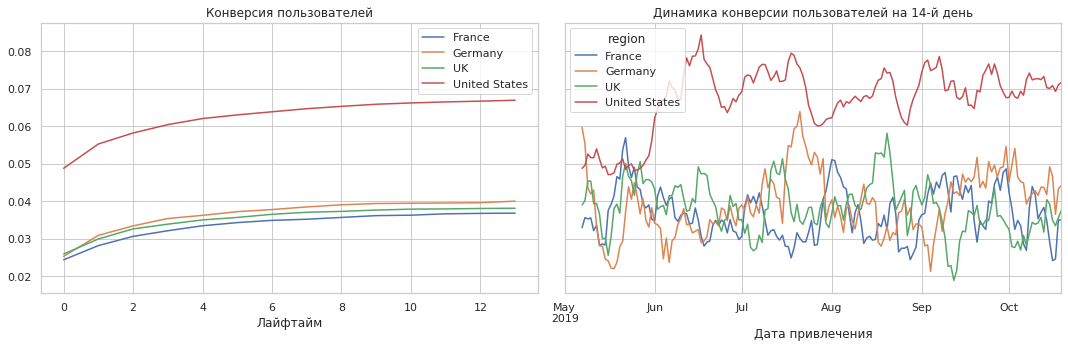

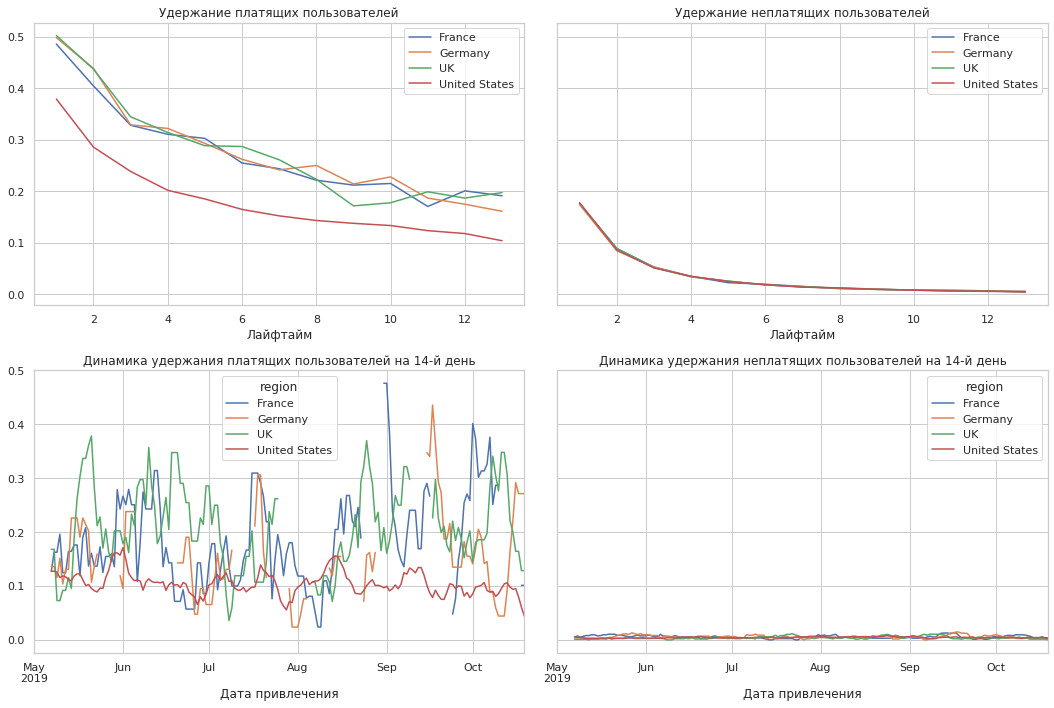

In [50]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

plot_retention(retention_grouped, retention_history, horizon_days) 

Пользователи из США хорошо платят, лучше чем остальные страны, но их привлечение стоит просто огромных денег. По этой причине, пользователи из этого региона не окупаются! Стоит обратить внимание на пользователей из Европы, привлечение стоит дешевле, они лучше окупаются. С середины Июня снизилась стоимость привлечения пользователей из Европы, это отличный повод для увеличения расходов на рекламу в этом регионе! Пользователи из США хорошо конвертируются, но плохо удерживаются. Неплатящие пользователи одинково плохо во всех регионах удерживаются.

#### Анализ окупаемости рекламы в США

###### По всем пользователям

In [51]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'), 
    orders, observation_date, horizon_days,
)

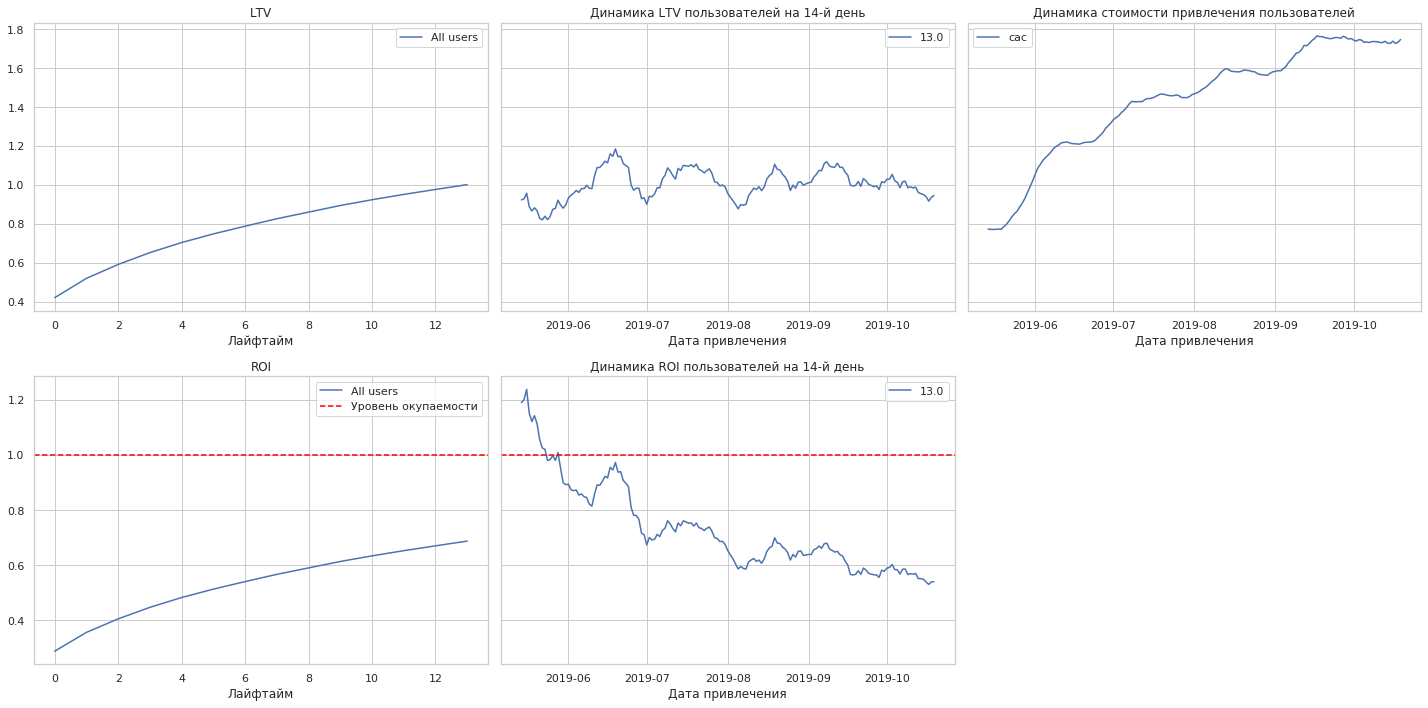

In [52]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

###### По устройствам

In [53]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'), 
    orders, observation_date, horizon_days, dimensions=dimensions
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

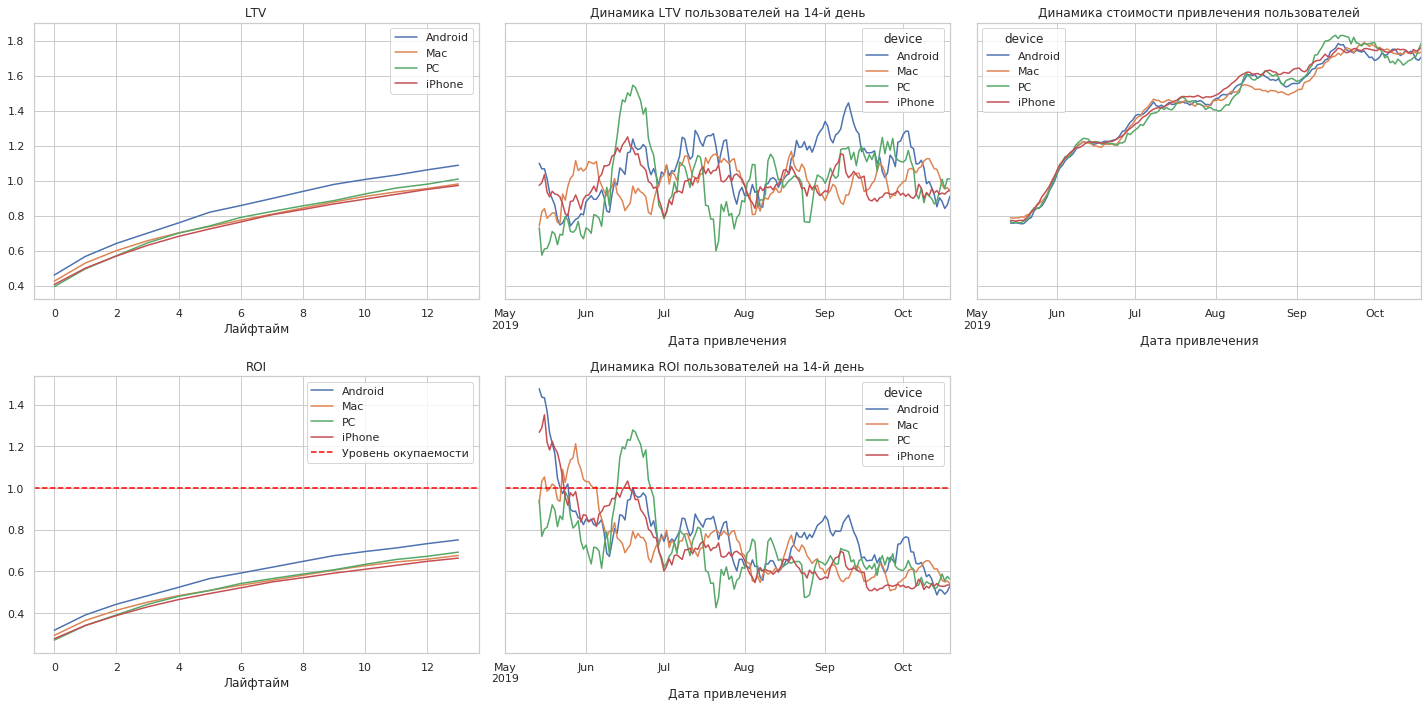

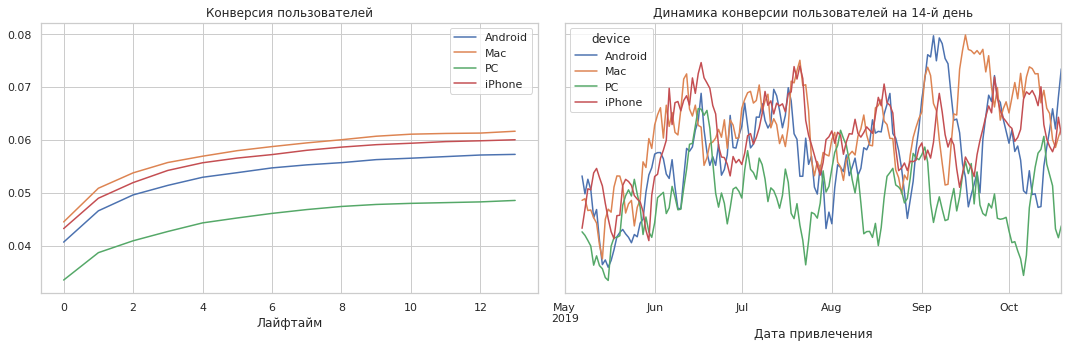

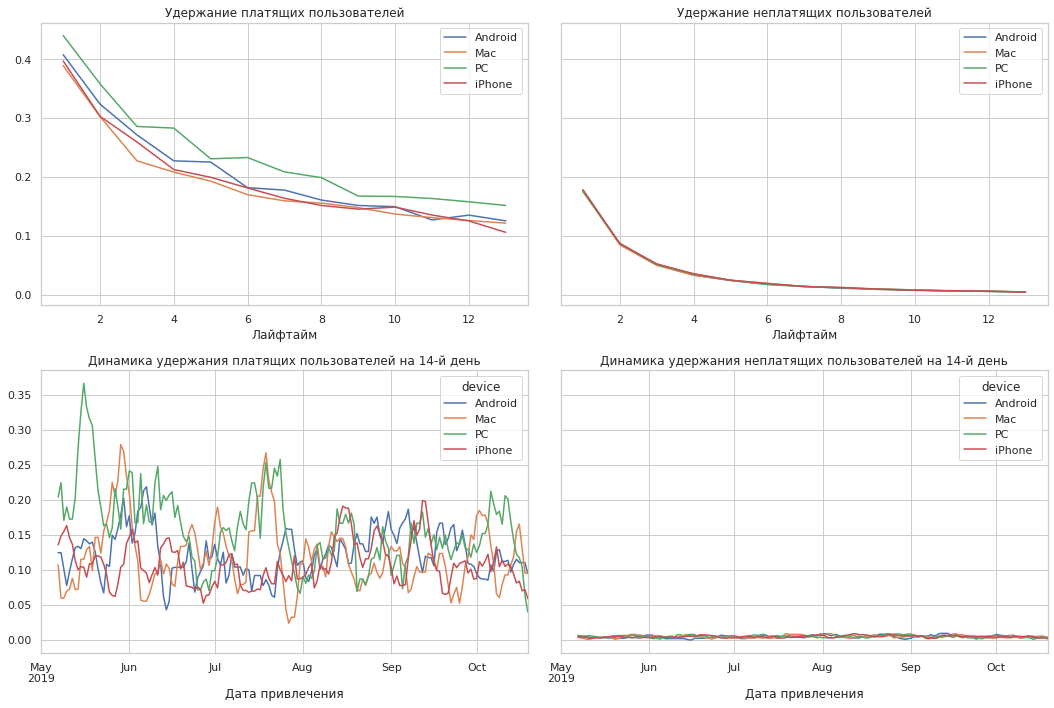

In [54]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

plot_retention(retention_grouped, retention_history, horizon_days) 

###### По каналам привлечения

In [55]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic" and region == "United States"'), 
    orders, observation_date, horizon_days, dimensions=dimensions
)

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

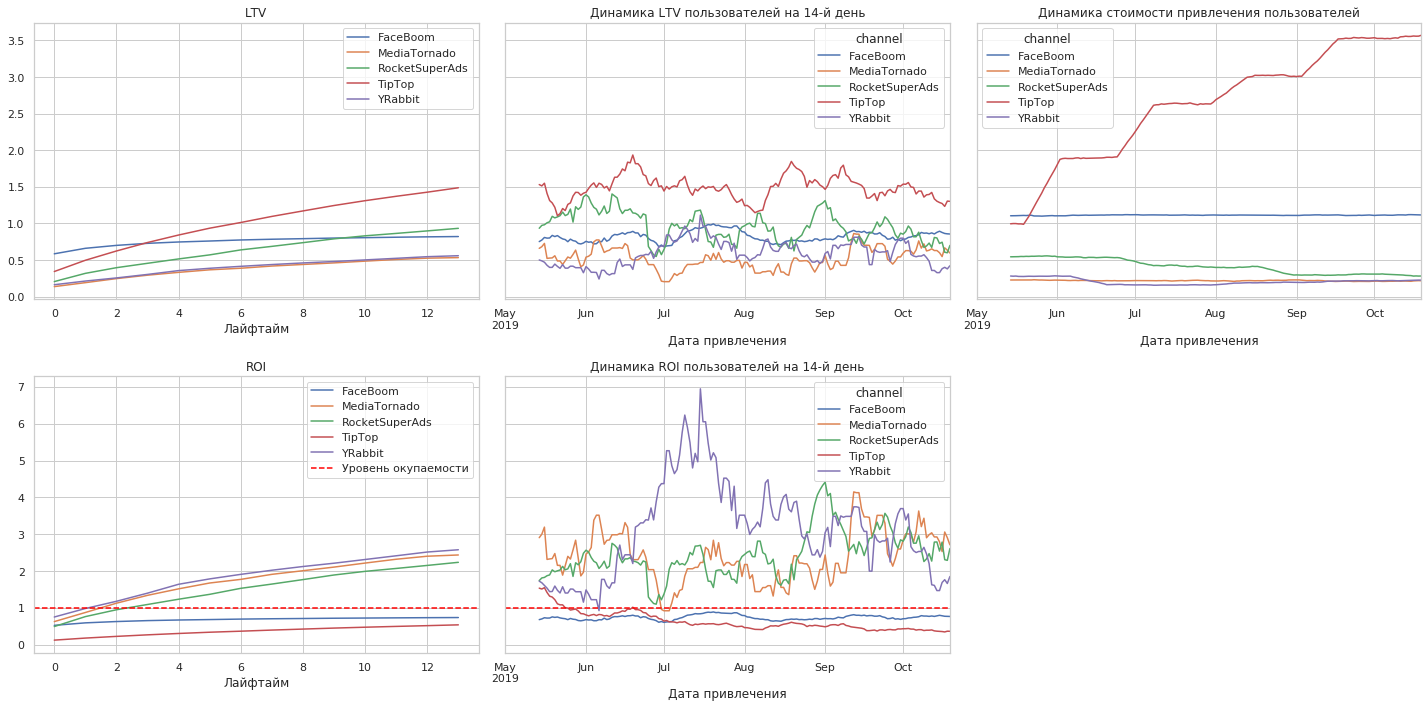

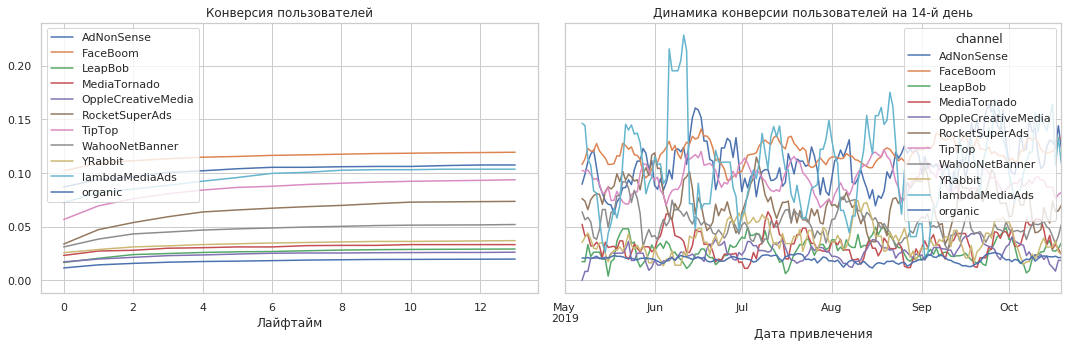

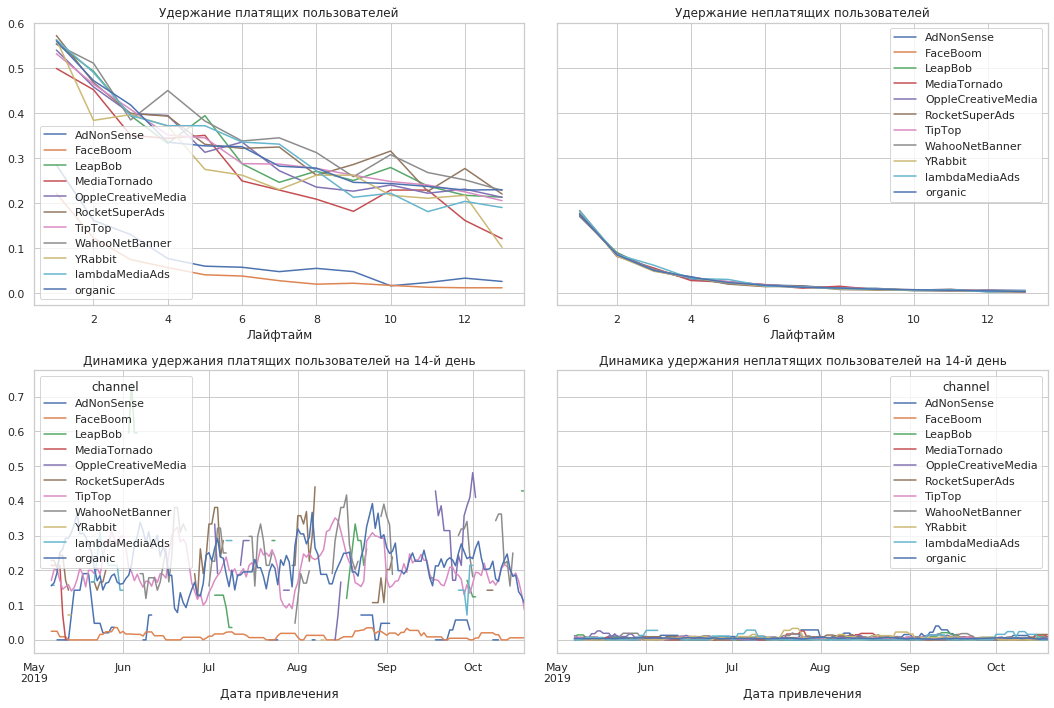

In [56]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14) 

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

plot_retention(retention_grouped, retention_history, horizon_days) 

США показывают снижение всех показателей. Этот рынок сильно невыгоден для приложения. Основные расходы идут на канал TipTop. Динамика стоимости привлечения всех пользователей сильно коррелирует с динамикой стоимости TipTop. Самый невыгодный канал привлечения. 

## Выводы

Больше всего пользователей приходит из США - 100002. Там же и самый высокий процент платящих пользователей, почти 7% всех пользователей из США платят. В то же время в странах Европы, посетителей намного меньше и только 4% из них готовы платить.

Большинство пользователей используют приложение на девайсах компании Apple, у них же самый высокий процент покупок. За ними идут пользователи Android с отставанием в 0,5%. PC последние с отставанием в 0,8% от Android.

FaceBoom, AdNonSense, lambdaMediaAds, TipTop имеют самый высокий процент платящих пользователей. Этим каналам стоит уделить особое внимание, при планировании маркетинговых акций. AdNonSense и lambdaMediaAds имеют большой потенциал для роста.

Июнь и Июль оказались самыми провальными месяцами.

Основная масса сессий длится до 2 часов. В среднем 30 минут.

Почти 5,6 тысяч пользователей сделали первую покупку меньше чем через 2 минуты, после первого посещения приложения. Среднее время 0,8 минуты. 3,2 тысячи пользователей решили подумать о покупке дольше - в среднем 5 дней или 2,5 дня по медиане.

Наблюдается снижение количества и суммы покупок на одного платящего пользователя.

C органическими(бесплатными) пользователями:
Привлечение стоило 0.70$

Безорганических(бесплатных) пользователей:
Привлечение стоило 1.13

PC хоть и имеет наименьший % платящих пользователей, но уверено лидирует по ROI, стоимость привлечения самая низкая. У компании Apple и самые лояльные и платящие пользователи, но они же являются самыми дорогими по стоимости привлечения, ROI не окупается. Пользователи PC плохо конвертируются, но удерживаются лучше остальных. Лучше всего конвертируются владельцы техники Apple, но плохо показывают себя в удержании.

Пользователи из США хорошо платят, лучше чем остальные страны, но их привлечение стоит просто огромных денег. По этой причине, пользователи из этого региона не окупаются. Пользователи из США хорошо конвертируются, но плохо удерживаются. Неплатящие пользователи одинково плохо удерживаются во всех регионах. 

США показывают снижение всех показателей. Этот рынок сильно невыгоден для приложения. Основные расходы идут на канал TipTop. Динамика стоимости привлечения всех пользователей сильно коррелирует с динамикой стоимости TipTop. Самый невыгодный канал привлечения.

Как и раньше, из всех рекламных каналов выделяется lambdaMediaAds. У нее самые лучшие показатели. А вот TipTop и FaceBoom показывают себя не с лучшей стороны. Хоть они и привлекают подавляющее большинство пользователей, эти каналы обходятся очень дорого и не окупаются. Стоимость привлечения через TipTop вообще выросла более чем в 3 раза. 
В топе конверсии находятся все те же рекламные каналы, которые хорошо показали себя в процентном соотношении платящих пользователей - FaceBoom, AdNonSense, lambdaMediaAds, TipTop. Но вот FaceBoom показывает просто ужасающие цифры по удержанию платящих пользователей. На 14 день пользователей почти нет. TipTop показывает средние результаты. AdNonSense и lambdaMediaAds показывают высокие результаты и по конверсии и по удержанию.

lambdaMediaAds - стоит развивать и делать упор именно на этот рекламный канал, в то время как TipTop становится слишком дорогим и не приносит той активности, за которую платится сильно больше денег. Стоит обратить внимание на пользователей из Европы, привлечение стоит дешевле, они лучше окупаются. С середины Июня снизилась стоимость привлечения пользователей из Европы, это отличный повод для увеличения расходов на рекламу в этом регионе!